# Save the best model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_xgb_model, f)

# Inform the user
print("The best model has been saved as 'best_model.pkl'.")
print("You can download it from the left-side file pane.")

# Move the file to a location accessible by the user
shutil.move("best_model.pkl", "/content/best_model.pkl")

In [29]:
# Import Libraries
import pandas as pd  # Library for tabular data manipulation
import numpy as np   # Library for array manipulation and mathematical operations
from sklearn.model_selection import train_test_split  # Import train_test_split function from scikit-learn
from sklearn.preprocessing import StandardScaler  # Import StandardScaler from scikit-learn for feature scaling
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier from scikit-learn for classification
from sklearn.model_selection import GridSearchCV  # Import GridSearchCV class from model_selection module in scikit-learn
from xgboost import XGBClassifier  # Import XGBClassifier from XGBoost library for classification
from sklearn.metrics import classification_report, accuracy_score  # Import classification report and accuracy score functions from scikit-learn
import pickle  # Library for saving and loading Python objects
import seaborn as sns  # Import seaborn library for data visualization
import matplotlib.pyplot as plt  # Import matplotlib library for creating plots
from sklearn.model_selection import cross_val_score # Import cross_val_score from sklearn.model_selection
from IPython.display import FileLink  # Import FileLink function from IPython.display to create file links
import shutil  # Library for file and directory operations

In [30]:
# Load dataset from CSV file into a DataFrame
data = pd.read_csv('data_D.csv')

In [31]:
# Display the first few rows of the dataset
data.head()

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,0,106473,15639576,Sarratt,652.0,France,Female,65.0,3,0.00,2,1,1,136592.24,0
1,1,62345,15769582,Hanson,464.0,France,Male,35.0,4,0.00,1,0,0,99505.75,1
2,2,126615,15675888,Austin,620.0,Germany,Female,39.0,6,129401.87,2,1,1,102681.32,1
3,3,35909,15786617,Tuan,598.0,France,Female,30.0,7,0.00,2,1,0,141210.18,0
4,4,45175,15757310,Li Fonti,682.0,Germany,Female,46.0,4,107720.57,1,0,0,93832.33,1


In [32]:
# Check the number of rows and columns in the dataset
data.shape

(41259, 15)

- Untuk angka pertama, yaitu 41259, mengindikasikan jumlah baris dalam dataset.
- Untuk angka kedua, yaitu 15, menandakan jumlah kolom atau fitur yang ada dalam dataset.

In [33]:
# Print the column names of the dataset
data.columns

Index(['Unnamed: 0', 'id', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'churn'],
      dtype='object')

Output di atas menunjukkan daftar nama-nama kolom dalam dataset. Setiap nama kolom mewakili satu fitur atau atribut dalam dataset.

In [34]:
# Display concise summary information about the DataFrame, including data types and non-null values count
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41259 entries, 0 to 41258
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       41259 non-null  int64  
 1   id               41259 non-null  int64  
 2   CustomerId       41259 non-null  int64  
 3   Surname          41259 non-null  object 
 4   CreditScore      41251 non-null  float64
 5   Geography        41259 non-null  object 
 6   Gender           41259 non-null  object 
 7   Age              41259 non-null  float64
 8   Tenure           41259 non-null  int64  
 9   Balance          41259 non-null  float64
 10  NumOfProducts    41259 non-null  int64  
 11  HasCrCard        41259 non-null  int64  
 12  IsActiveMember   41259 non-null  int64  
 13  EstimatedSalary  41259 non-null  float64
 14  churn            41259 non-null  int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 4.7+ MB


Output di atas menunjukkan informasi rinci tentang dataset dalam format DataFrame. Berikut adalah penjelasan detailnya:

- RangeIndex: Menunjukkan bahwa indeks dataset memiliki rentang dari 0 hingga 41258, dengan total 41259 entri atau baris data.
- Data columns: Menyajikan informasi tentang kolom-kolom dalam dataset beserta jumlah non-null values dan tipe data (Dtype) dari setiap kolom.
Total columns (total 15 columns): Mengindikasikan bahwa dataset memiliki total 15 kolom.

Setiap baris pada bagian "Data columns" memberikan informasi tentang kolom-kolom dalam dataset, yang meliputi:
- Column: Nama kolom atau fitur dalam dataset.
- Non-Null Count: Jumlah nilai non-null atau tidak kosong dalam kolom tersebut. Misalnya, 'CreditScore' memiliki 41251 nilai non-null, artinya ada 8 nilai yang kosong dalam kolom tersebut.
- Dtype: Tipe data dari nilai-nilai dalam kolom tersebut, seperti float64 (untuk bilangan desimal), int64 (untuk bilangan bulat), atau object (untuk tipe data string atau kategori).

Selanjutnya, di bagian bawah, terdapat informasi tambahan tentang dataset, termasuk:
- Memory usage: Menunjukkan penggunaan memori yang diperlukan oleh dataset. Dalam hal ini, dataset menggunakan sekitar 4.7+ MB memori.

In [35]:
# Count the number of data in the 'churn' column
data['churn'].value_counts()

churn
0    32540
1     8719
Name: count, dtype: int64

Output di atas menunjukkan jumlah data atau frekuensi masing-masing nilai dalam kolom 'churn'.
- Nilai 0 mewakili pelanggan yang tidak mengalami churn dengan 32540
- Niali 1 mewakili pelanggan yang mengalami churn. dengan 8719]

##Data Preprocessing

In [36]:
# Drop unnecessary columns
data.drop(['Unnamed: 0', 'id', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [37]:
# Check the number of rows and columns in the dataset after dropping columns
data.shape

(41259, 11)

Output di atas menunjukkan penghapusan (drop) terhadap beberapa kolom telah berhasil dilakukan sehingga jumlah baris dan kolom dalam dataset seudah berubah menjadi 11. Kolom yang dihapus tidak mempengaruhi hasil prediksi.





### Pisahkan Target

In [38]:
# Separate Features and Target
X = data.drop(['churn'], axis=1)  # Features other than the target
y = data['churn']  # Target

###Split Train dan Test

In [39]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Check Missing Values di Data Training dan Testing

In [40]:
# Check for missing values in the training data
missing_values_train = X_train.isnull().sum()

# Check for missing values in the testing data
missing_values_test = X_test.isnull().sum()

print("Missing values in the training data:")
print(missing_values_train)

print("\nMissing values in the testing data:")
print(missing_values_test)

Missing values in the training data:
CreditScore        7
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

Missing values in the testing data:
CreditScore        1
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64


Output di atas menunjukkan adanya jumlah nilai yang hilang (missing values) dalam data training dan data testing dalam kolom  'Credit Score'.

### Check Outliers

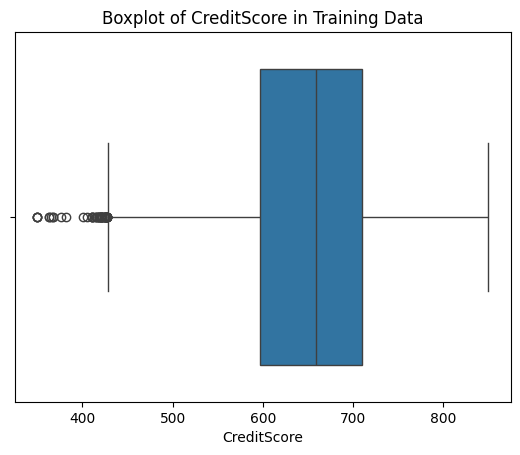

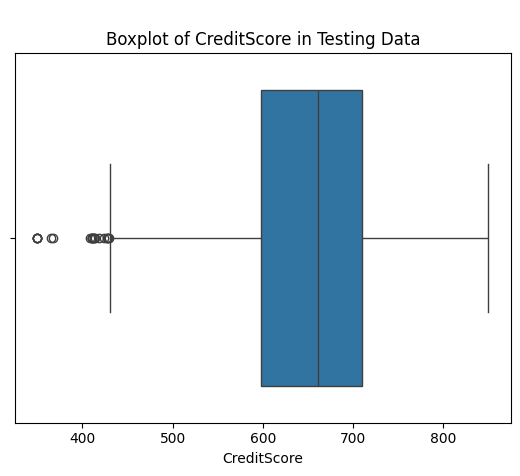

In [41]:
# Check outliers for the 'CreditScore' column in the training data
sns.boxplot(x=X_train['CreditScore'])
plt.title('Boxplot of CreditScore in Training Data')
plt.show()

# Check outliers for the 'CreditScore' column in the testing data
sns.boxplot(x=X_test['CreditScore'])
plt.title('\nBoxplot of CreditScore in Testing Data')
plt.show()

Output di atas menunjukkan adanya outliers dalam data training dan data testing dalam kolom  'Credit Score', sehingga untuk penanganannya akan menggunakan nilai median untuk mengisi nilai yang hilang (missing values).

### Handling Missing Values

In [42]:
# Find the median of the 'CreditScore' column
print("Median CreditScore:", np.nanmedian(X_train['CreditScore']))

Median CreditScore: 659.0


Output di atas menunjukkan nilai median dari kolom 'CreditScore', yang merupakan 659.0.

In [43]:
# Fill missing values with the median for training, testing, and validation data
X_train['CreditScore'].fillna(659, inplace=True)
X_test['CreditScore'].fillna(659, inplace=True)

In [44]:
# Recheck missing values in the training data
missing_values_train = X_train.isnull().sum()

# Recheck missing values in the testing data
missing_values_test = X_test.isnull().sum()

print("Missing values in the training data:")
print(missing_values_train)

print("\nMissing values in the testing data:")
print(missing_values_test)

Missing values in the training data:
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

Missing values in the testing data:
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64


In [45]:
# Recheck training and testing data
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33007 entries, 23629 to 15795
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      33007 non-null  float64
 1   Geography        33007 non-null  object 
 2   Gender           33007 non-null  object 
 3   Age              33007 non-null  float64
 4   Tenure           33007 non-null  int64  
 5   Balance          33007 non-null  float64
 6   NumOfProducts    33007 non-null  int64  
 7   HasCrCard        33007 non-null  int64  
 8   IsActiveMember   33007 non-null  int64  
 9   EstimatedSalary  33007 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 2.8+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 8252 entries, 37555 to 28662
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      8252 non-null   float64
 1   Geography        8252 non-nu

Output di atas menunjukkan hasil pengecekan kembali jumlah nilai yang hilang setelah dilakukan pengisian nilai yang hilang (fillna) dalam data training dan data testing.

## Feature Engineering

### Encoding

Kolom 'Gepgraphy' dan 'Gender' memiliki data type  object yaitu string sehingga perlunya dilakukan one hot encoding. Proses one-hot encoding penting dilakukan untuk mengubah variabel kategorikal menjadi numerical, bentuk yang dapat dipahami oleh model pembelajaran mesin, sehingga dapat meningkatkan kinerja dan akurasi model.

In [46]:
# One-Hot Encoding for 'Geography' in X_train and X_test
X_train_geo = pd.get_dummies(X_train['Geography'], prefix='Geo').astype(int)
X_test_geo = pd.get_dummies(X_test['Geography'], prefix='Geo').astype(int)

# Merge back to X_train and X_test datasets
X_train = pd.concat([X_train.drop('Geography', axis=1), X_train_geo], axis=1)
X_test = pd.concat([X_test.drop('Geography', axis=1), X_test_geo], axis=1)

In [47]:
# One-Hot Encoding for 'Gender' in X_train and X_test
X_train_gender = pd.get_dummies(X_train['Gender'], prefix='Gender').astype(int)
X_test_gender = pd.get_dummies(X_test['Gender'], prefix='Gender').astype(int)

# Merge back to X_train and X_test datasets
X_train = pd.concat([X_train.drop('Gender', axis=1), X_train_gender], axis=1)
X_test = pd.concat([X_test.drop('Gender', axis=1), X_test_gender], axis=1)

In [48]:
# Display the first few rows of the encoded data
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_France,Geo_Germany,Geo_Spain,Gender_Female,Gender_Male
23629,708.0,45.0,2,0.0,1,1,0,182076.97,1,0,0,1,0
6996,676.0,35.0,7,0.0,2,1,0,166053.92,0,0,1,0,1
26510,645.0,36.0,4,133980.8,1,1,1,112333.63,1,0,0,1,0
40020,791.0,37.0,1,0.0,2,1,0,132973.17,0,0,1,0,1
17668,637.0,48.0,7,0.0,2,1,1,146573.66,1,0,0,1,0


In [49]:
# Display the first few rows of the encoded data
X_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_France,Geo_Germany,Geo_Spain,Gender_Female,Gender_Male
37555,680.0,32.0,2,0.00,2,0,1,38614.69,0,0,1,1,0
4280,605.0,32.0,3,0.00,2,1,0,138051.19,1,0,0,0,1
36838,826.0,39.0,8,113905.48,2,0,1,174043.40,0,1,0,1,0
39035,697.0,44.0,3,0.00,1,1,1,143357.07,0,0,1,0,1
22201,550.0,56.0,2,103391.38,1,1,0,90878.13,0,1,0,1,0


One Hot Encoding telah berhasil dilakukan. Setiap baris data pada kolom 'Geography' dan 'Gender' sudah berubah menjadi nilai 0 atau 1.

### Standard Scaler untuk Numerical Data

Kemudian perlunya StandardScaler yang digunakan untuk menormalkan atau standarisasi fitur-fitur numerik dalam sebuah dataset.

In [50]:
# List of numeric columns for scaling
numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Initialize StandardScaler
scaler = StandardScaler()

# Scale training data
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

# Scale testing data
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [51]:
# Display the first few rows of the scaled data
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_France,Geo_Germany,Geo_Spain,Gender_Female,Gender_Male
23629,0.645310,0.789602,-1.072085,-0.886546,-1.014612,1,0,1.384287,1,0,0,1,0
6996,0.245562,-0.347769,0.715373,-0.886546,0.815904,1,0,1.066763,0,0,1,0,1
26510,-0.141694,-0.234032,-0.357102,1.244564,-1.014612,1,1,0.002202,1,0,0,1,0
40020,1.682157,-0.120294,-1.429577,-0.886546,0.815904,1,0,0.411210,0,0,1,0,1
17668,-0.241631,1.130813,0.715373,-0.886546,0.815904,1,1,0.680728,1,0,0,1,0


In [52]:
# Display the first few rows of the scaled data
X_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_France,Geo_Germany,Geo_Spain,Gender_Female,Gender_Male
37555,0.295530,-0.688980,-1.072085,-0.886546,0.815904,0,1,-1.458667,0,0,1,1,0
4280,-0.641380,-0.688980,-0.714594,-0.886546,0.815904,1,0,0.511840,1,0,0,0,1
36838,2.119381,0.107180,1.072865,0.925244,0.815904,0,1,1.225088,0,1,0,1,0
39035,0.507897,0.675865,-0.714594,-0.886546,-1.014612,1,1,0.616985,0,0,1,0,1
22201,-1.328447,2.040709,-1.072085,0.758006,-1.014612,1,0,-0.422976,0,1,0,1,0


Scalling dan Normalisasi telah berhasil dilakukan. Setiap data pada kolom sudah memiliki rentang nilai antara -1 hingga 1 atau -2 hingga 2. Setiap fitur akan memiliki mean 0 dan standar deviasi 1.

## Random Forest

### By Default

In [53]:
# Define and Train the Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [54]:
# Evaluate Random Forest
rf_predictions = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      6513
           1       0.72      0.50      0.59      1739

    accuracy                           0.85      8252
   macro avg       0.80      0.73      0.75      8252
weighted avg       0.84      0.85      0.84      8252



Output di atas menunjukkan laporan klasifikasi (classification report) untuk model Random Forest by default. Laporan ini memberikan evaluasi kinerja model berdasarkan beberapa metrik, sebagai berikut:

- Precision: Precision mengukur tingkat keakuratan dari hasil prediksi positif. Dalam konteks ini, precision untuk kelas 0 (tidak churn) adalah 0.88, yang berarti 88% dari prediksi yang diklasifikasikan sebagai tidak churn benar-benar tidak churn, sedangkan precision untuk kelas 1 (churn) adalah 0.72, yang berarti 72% dari prediksi yang diklasifikasikan sebagai churn benar-benar churn.
- Recall: Recall mengukur seberapa baik model dapat mengidentifikasi semua kasus yang sebenarnya positif. Recall untuk kelas 0 adalah 0.95, yang berarti 95% dari semua kasus yang sebenarnya tidak churn berhasil diidentifikasi oleh model, sedangkan recall untuk kelas 1 adalah 0.50, yang berarti hanya 50% dari semua kasus yang sebenarnya churn berhasil diidentifikasi oleh model.
- F1-score: F1-score adalah rata-rata harmonis dari precision dan recall. F1-score memberikan keseimbangan antara precision dan recall. F1-score untuk kelas 0 adalah 0.91 dan untuk kelas 1 adalah 0.59.
- Support: Support adalah jumlah kemunculan setiap kelas dalam data uji. Dalam konteks ini, jumlah support untuk kelas 0 adalah 6513 dan untuk kelas 1 adalah 1739.
- Accuracy: Akurasi adalah proporsi prediksi yang benar secara keseluruhan. Akurasi model ini adalah 0.85 atau 85%.
- Macro Average dan Weighted Average: Macro average adalah rata-rata sederhana dari metrik evaluasi (precision, recall, f1-score) untuk setiap kelas. - Weighted average adalah rata-rata di mana setiap metrik diberi bobot berdasarkan support untuk setiap kelas.

### Tuning

In [55]:
# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],  # Adding 100 which is your initial value
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],  # Value of 1 is invalid, as the minimum value is 2
    'min_samples_leaf': [1, 2]
}

# Initialize RandomForestClassifier model with random_state for reproducibility
clf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV with the encoded training data
grid_search.fit(X_train, y_train)  # Make sure X_train is pre-encoded if necessary

# Find the best hyperparameter combination
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Retrain the model with the entire training data using the best parameters
# This is not always necessary, as GridSearchCV already trains the best model on the entire training data
best_rf_model.fit(X_train, y_train)

Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


RandomForestClassifier(max_depth=10, random_state=42)

In [56]:
# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Print the classification report
print("Random Forest Tuned Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Tuned Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      6513
           1       0.77      0.47      0.59      1739

    accuracy                           0.86      8252
   macro avg       0.82      0.72      0.75      8252
weighted avg       0.85      0.86      0.85      8252



Output di atas menunjukkan laporan klasifikasi untuk model Random Forest yang telah dituning (disesuaikan parameter-parameternya dengan GridSearchCV) dari hasil evaluasi kinerjanya. Laporan ini memberikan pemahaman yang lebih dalam tentang bagaimana model yang telah dituning bekerja.

Berikut laporan evaluasi kinerja model berdasarkan beberapa metrik:

- Precision: Precision mengukur tingkat keakuratan prediksi positif dari model. Untuk kelas 0 (tidak churn), precision adalah 0.87, yang berarti sekitar 87% dari prediksi yang diklasifikasikan sebagai tidak churn adalah benar-benar tidak churn. Sedangkan untuk kelas 1 (churn), precision adalah 0.77, yang berarti sekitar 77% dari prediksi yang diklasifikasikan sebagai churn adalah benar-benar churn.
- Recall: Recall mengukur kemampuan model dalam mengidentifikasi semua kasus yang sebenarnya positif. Untuk kelas 0, recall adalah 0.96, yang berarti sekitar 96% dari semua kasus yang sebenarnya tidak churn berhasil diidentifikasi oleh model. Sedangkan untuk kelas 1, recall adalah 0.47, yang berarti hanya sekitar 47% dari semua kasus yang sebenarnya churn yang berhasil diidentifikasi oleh model.
- F1-score: F1-score adalah rata-rata harmonis dari precision dan recall, memberikan keseimbangan antara keduanya. Untuk kelas 0, F1-score adalah 0.92, dan untuk kelas 1, F1-score adalah 0.59.
- Support: Support adalah jumlah kemunculan setiap kelas dalam data uji. Dalam konteks ini, jumlah support untuk kelas 0 adalah 6513 dan untuk kelas 1 adalah 1739.
- Accuracy: Akurasi adalah proporsi prediksi yang benar secara keseluruhan. Akurasi model ini adalah 0.86 atau 86%.
- Macro Average dan Weighted Average: Macro average adalah rata-rata sederhana dari metrik evaluasi (precision, recall, f1-score) untuk setiap kelas. - Weighted average adalah rata-rata di mana setiap metrik diberi bobot berdasarkan support untuk setiap kelas.

## XGBoost

### By Default

In [57]:
# Define and Train the XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [58]:
# Evaluate XGBoost
xgb_predictions = xgb_model.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      6513
           1       0.73      0.54      0.62      1739

    accuracy                           0.86      8252
   macro avg       0.81      0.74      0.77      8252
weighted avg       0.85      0.86      0.85      8252



Output di atas adalah laporan klasifikasi untuk model XGBoost by default. Laporan ini memberikan evaluasi kinerja model berdasarkan beberapa metrik, sebagai berikut:

- Precision: Precision mengukur tingkat keakuratan dari hasil prediksi positif dari model. Untuk kelas 0 (tidak churn), precision adalah 0.89, yang berarti sekitar 89% dari prediksi yang diklasifikasikan sebagai tidak churn adalah benar-benar tidak churn. Sedangkan untuk kelas 1 (churn), precision adalah 0.73, yang berarti sekitar 73% dari prediksi yang diklasifikasikan sebagai churn adalah benar-benar churn.
- Recall: Recall mengukur kemampuan model dalam mengidentifikasi semua kasus yang sebenarnya positif. Untuk kelas 0, recall adalah 0.95, yang berarti sekitar 95% dari semua kasus yang sebenarnya tidak churn berhasil diidentifikasi oleh model. Sedangkan untuk kelas 1, recall adalah 0.54, yang berarti sekitar 54% dari semua kasus yang sebenarnya churn berhasil diidentifikasi oleh model.
- F1-score: F1-score adalah rata-rata harmonis dari precision dan recall, memberikan keseimbangan antara keduanya. Untuk kelas 0, F1-score adalah 0.92, dan untuk kelas 1, F1-score adalah 0.62.
- Support: Support adalah jumlah kemunculan setiap kelas dalam data uji. Dalam konteks ini, jumlah support untuk kelas 0 adalah 6513 dan untuk kelas 1 adalah 1739.
- Accuracy: Akurasi adalah proporsi prediksi yang benar secara keseluruhan. Akurasi model ini adalah 0.86 atau 86%.
- Macro Average dan Weighted Average: Macro average adalah rata-rata sederhana dari metrik evaluasi (precision, recall, f1-score) untuk setiap kelas. - Weighted average adalah rata-rata di mana setiap metrik diberi bobot berdasarkan support untuk setiap kelas.


## Tuning

In [60]:
# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize XGBoost model with some initial parameters
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV with the training data
grid_search.fit(X_train, y_train)

# Find the best hyperparameter combination
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Get the best model from the grid search
best_xgb_model = grid_search.best_estimator_

# Retrain the model with the entire training data using the best parameters
best_xgb_model.fit(X_train, y_train)



Best parameters found:  {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [61]:
# Predict classes for the test data using the best model
y_pred = best_xgb_model.predict(X_test)

# Print classification report
print("XGBoost Tuned Classification Report:")
print(classification_report(y_test, y_pred))


XGBoost Tuned Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6513
           1       0.76      0.52      0.62      1739

    accuracy                           0.86      8252
   macro avg       0.82      0.74      0.77      8252
weighted avg       0.86      0.86      0.85      8252



Output di atas laporan klasifikasi untuk model XGBoost yang telah dituning (disesuaikan parameter-parameternya dengan GridSearchCV) dari hasil evaluasi kinerjanya. Laporan ini memberikan pemahaman yang lebih dalam tentang bagaimana model yang telah dituning bekerja.

Berikut laporan evaluasi kinerja model berdasarkan beberapa metrik:

- Precision: Precision mengukur tingkat keakuratan dari hasil prediksi positif dari model. Untuk kelas 0 (tidak churn), precision adalah 0.88, yang berarti sekitar 88% dari prediksi yang diklasifikasikan sebagai tidak churn adalah benar-benar tidak churn. Sedangkan untuk kelas 1 (churn), precision adalah 0.76, yang berarti sekitar 76% dari prediksi yang diklasifikasikan sebagai churn adalah benar-benar churn.
- Recall: Recall mengukur kemampuan model dalam mengidentifikasi semua kasus yang sebenarnya positif. Untuk kelas 0, recall adalah 0.96, yang berarti sekitar 96% dari semua kasus yang sebenarnya tidak churn berhasil diidentifikasi oleh model. Sedangkan untuk kelas 1, recall adalah 0.52, yang berarti sekitar 52% dari semua kasus yang sebenarnya churn berhasil diidentifikasi oleh model.
- F1-score: F1-score adalah rata-rata harmonis dari precision dan recall, memberikan keseimbangan antara keduanya. Untuk kelas 0, F1-score adalah 0.92, dan untuk kelas 1, F1-score adalah 0.62.
- Support: Support adalah jumlah kemunculan setiap kelas dalam data uji. Dalam konteks ini, jumlah support untuk kelas 0 adalah 6513 dan untuk kelas 1 adalah 1739.
- Accuracy: Akurasi adalah proporsi prediksi yang benar secara keseluruhan. Akurasi model ini adalah 0.86 atau 86%.
- Macro Average dan Weighted Average: Macro average adalah rata-rata sederhana dari metrik evaluasi (precision, recall, f1-score) untuk setiap kelas. Weighted average adalah rata-rata di mana setiap metrik diberi bobot berdasarkan support untuk setiap kelas.

## Model Terbaik

In [62]:
# Evaluate RandomForest with cross-validation (default)
rf_default_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("RandomForest Default Cross-Validation Scores:", rf_default_scores)
print("RandomForest Default Average Cross-Validation Score:", rf_default_scores.mean())
print()

# Evaluate RandomForest with cross-validation (tuned)
rf_tuned_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("RandomForest Tuned Cross-Validation Scores:", rf_tuned_scores)
print("RandomForest Tuned Average Cross-Validation Score:", rf_tuned_scores.mean())
print()

# Evaluate XGBoost with cross-validation (default)
xgb_default_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')
print("XGBoost Default Cross-Validation Scores:", xgb_default_scores)
print("XGBoost Default Average Cross-Validation Score:", xgb_default_scores.mean())
print()

# Evaluate XGBoost with cross-validation (tuned)
xgb_tuned_scores = cross_val_score(best_xgb_model, X_train, y_train, cv=5, scoring='accuracy')
print("XGBoost Tuned Cross-Validation Scores:", xgb_tuned_scores)
print("XGBoost Tuned Average Cross-Validation Score:", xgb_tuned_scores.mean())

RandomForest Default Cross-Validation Scores: [0.86367767 0.8576189  0.85305257 0.85396152 0.85290108]
RandomForest Default Average Cross-Validation Score: 0.856242348232789

RandomForest Tuned Cross-Validation Scores: [0.8650409  0.85822478 0.85850629 0.8601727  0.86168762]
RandomForest Tuned Average Cross-Validation Score: 0.8607264576374165

XGBoost Default Cross-Validation Scores: [0.86216298 0.85883066 0.85335555 0.85683987 0.85517346]
XGBoost Default Average Cross-Validation Score: 0.8572725043587852

XGBoost Tuned Cross-Validation Scores: [0.87003938 0.86367767 0.85926375 0.86380851 0.86623239]
XGBoost Tuned Average Cross-Validation Score: 0.8646043412496459


Dengan demikian, kesimpulan yang dapat diambil adalah:

*   Model terbaik adalah XGBoost yang telah dituning.
*   Rata-rata nilai cross-validation untuk XGBoost yang telah dituning adalah sekitar 0.8646, sedangkan untuk RandomForest yang telah dituning sekitar 0.8607.
*   Dalam kasus ini, XGBoost memberikan performa yang lebih baik daripada RandomForest.







In [63]:
# Save the best model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_xgb_model, f)

# Inform the user
print("The best model has been saved as 'best_model.pkl'.")
print("You can download it from the left-side file pane.")

# Move the file to a location accessible by the user
shutil.move("best_model.pkl", "/content/best_model.pkl")

The best model has been saved as 'best_model.pkl'.
You can download it from the left-side file pane.


'/content/best_model.pkl'